# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

#### Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

#### Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Part 1: Analyzing Best-Seller Trends Across Product Categories

#### Objective: Understand the relationship between product categories and their best-seller status.

##### Crosstab Analysis:

- Create a crosstab between the product category and the isBestSeller status.

- Are there categories where being a best-seller is more prevalent?
   - Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

- Statistical Tests:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

- Visualizations:
        Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import math
from scipy.stats.contingency import association

pd.set_option('display.max_columns', None)

# Read the text file into a DataFrame
df= pd.read_csv(r'data.csv')
pd.set_option("display.max_columns", None)

In [2]:
df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1695331,1909189,B07DC9ZPDM,"Warrior, Creatine Monohydrate Tablets – 1000mg...",4.1,192,6.99,False,400,Sports Supplements
2195644,2541633,B01H2SVDC6,Happy 18th Birthday Blue Holographic Foil Part...,4.6,842,2.10,False,100,Arts & Crafts
421353,453267,B0CCVFLSKV,Fashion Women's Loose Christmas Print Long Sle...,0.0,0,16.33,False,0,Sports & Outdoors
1771198,1993670,B0BR9JMQ3T,"Women's Straw Clutch Purse, Beach Shoulder Tot...",3.9,15,12.99,False,0,Luggage and travel gear
2092111,2377653,B0CD7ZG5KT,TUQIDEWU Mens Autumn And Winter Jackets Male A...,0.0,0,20.49,False,0,Sports & Outdoors


In [3]:
#1.1 Create a crosstab between the product category and the isBestSeller status.
crosstab = pd.crosstab(df['category'], df['isBestSeller']).sort_values(by=True, ascending=False)

In [4]:
crosstab.head(5)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


In [27]:
crosstab['proportion_best_seller'] = crosstab['proportion_best_seller'].round(2)

In [24]:
crosstab.head(5)

isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.06
Health & Personal Care,9017,552,0.06
Baby,14709,341,0.02
Sports & Outdoors,835935,330,0.00
Power & Hand Tools,8353,306,0.04


#### Are there categories where being a best-seller is more prevalent?
##### Top categoties are grocery, health & prsonal care, baby, sports&outdoors, and power&hands tools

In [8]:
#1.2 Conduct a chi-square test to determine if the best seller distribution is independent of the product category

chi2, p, dof, ex = stats.chi2_contingency(crosstab)
expected = ex

In [28]:
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")



Chi-square statistic: 36708.76981374701
P-value: 0.0
Degrees of freedom: 590


# p-value is 0 so it indicates that there is a significant dependency betweek product category and is best seller

In [16]:
# Compute Cramér's V
n = crosstab.sum().sum()
cramers_v = np.sqrt((chi2 / n) / (min(crosstab.shape) - 1))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.08666628463732609


In [41]:
crosstab_top_category = crosstab.head(5)


(5, 3)

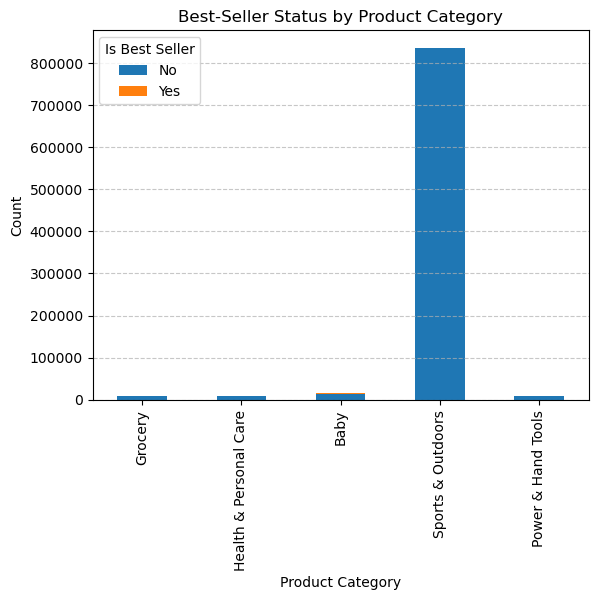

In [42]:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_top_category.plot(kind='bar', stacked=True)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Best-Seller Status by Product Category')
plt.legend(title='Is Best Seller', loc='upper left', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

#### Objective: Investigate how different product categories influence product prices.

#### Preliminary Step: Remove outliers in product prices.

-  For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

    - Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

- Violin Plots: Use a violin plot to visualize the distribution of price across different product categories. Filter out  the top 20 categories based on count for better visualization. Which product category tends to have the highest median price? Don't filter here by top categories.

- Bar Charts: Create a bar chart comparing the average price of products for the top 10 product categories (based on count).Which product category commands the highest average price? Don't filter here by top categories.

- Box Plots: Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
        Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [47]:
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_price_without_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

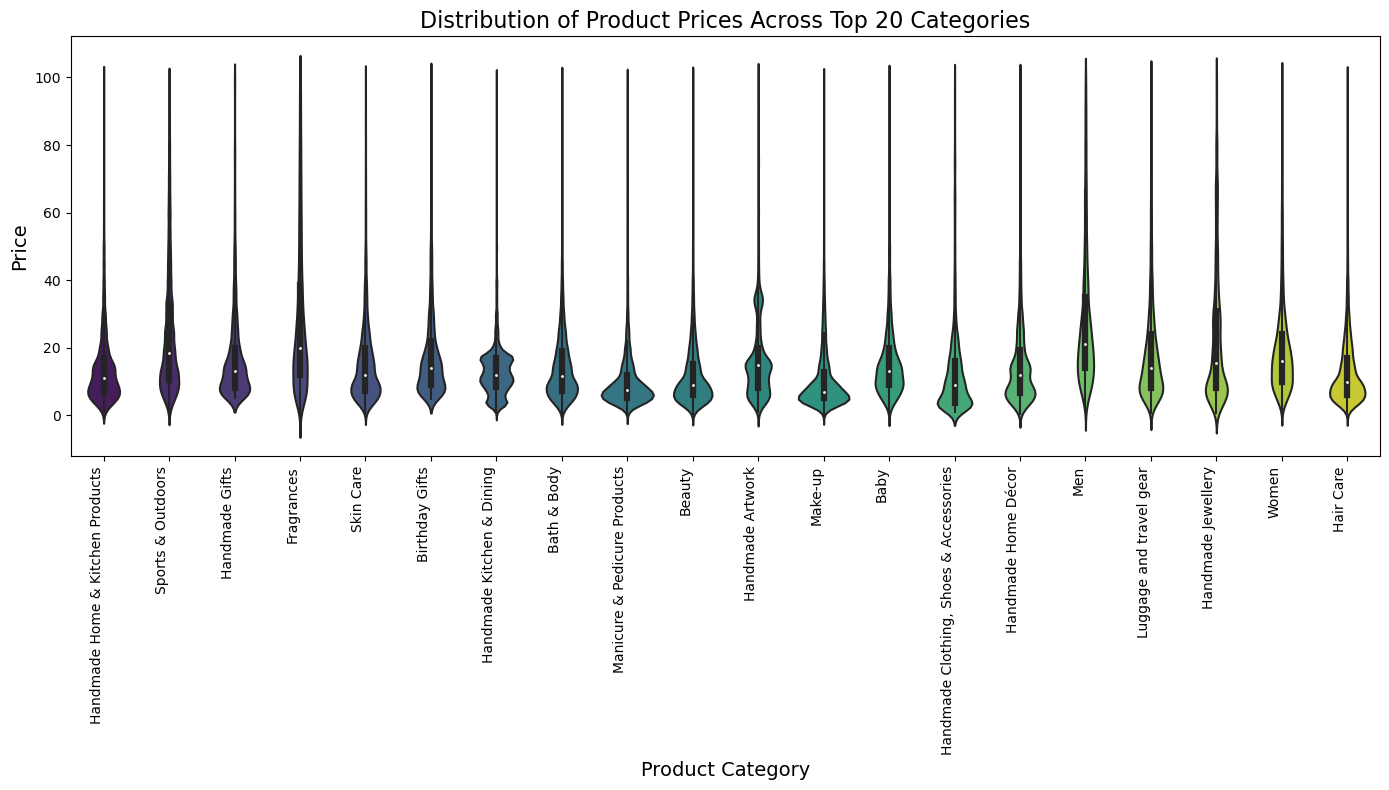

In [50]:
#2.2 Violin Plots:
# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

# Filter top 20 categories based on count
top_categories = df_price_without_outliers['category'].value_counts().head(20).index
df_filtered = df_price_without_outliers[df_price_without_outliers['category'].isin(top_categories)]

# Create a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_filtered, x='category', y='price', palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of Product Prices Across Top 20 Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.show()



In [53]:
# Which product category tends to have the highest median price? Don't filter here by top categories.

# Calculate median prices
median_prices = df_price_without_outliers.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()
highest_median_category, highest_median_price 

('Desktop PCs', 74.0)

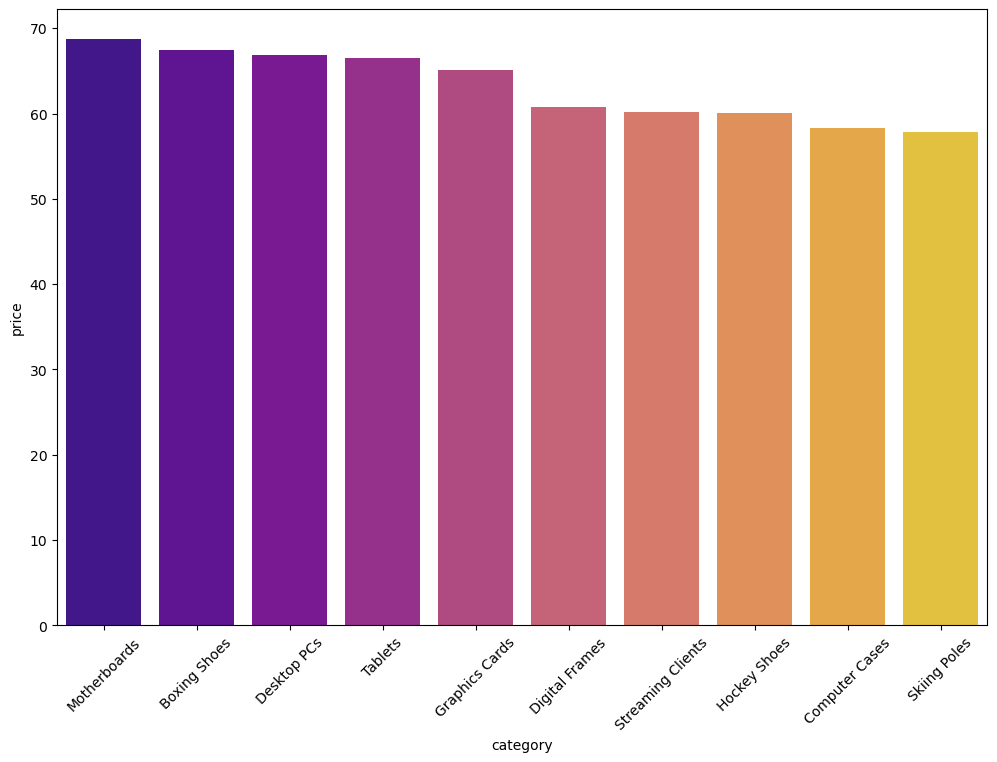

In [62]:
# 2.3 Bar Charts:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.
av_price_top10_df = df_price_without_outliers[["category", 'price']].groupby("category").mean().sort_values(by='price', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=av_price_top10_df, x="category", y='price', palette="plasma")
plt.xticks(rotation=45)

plt.show()

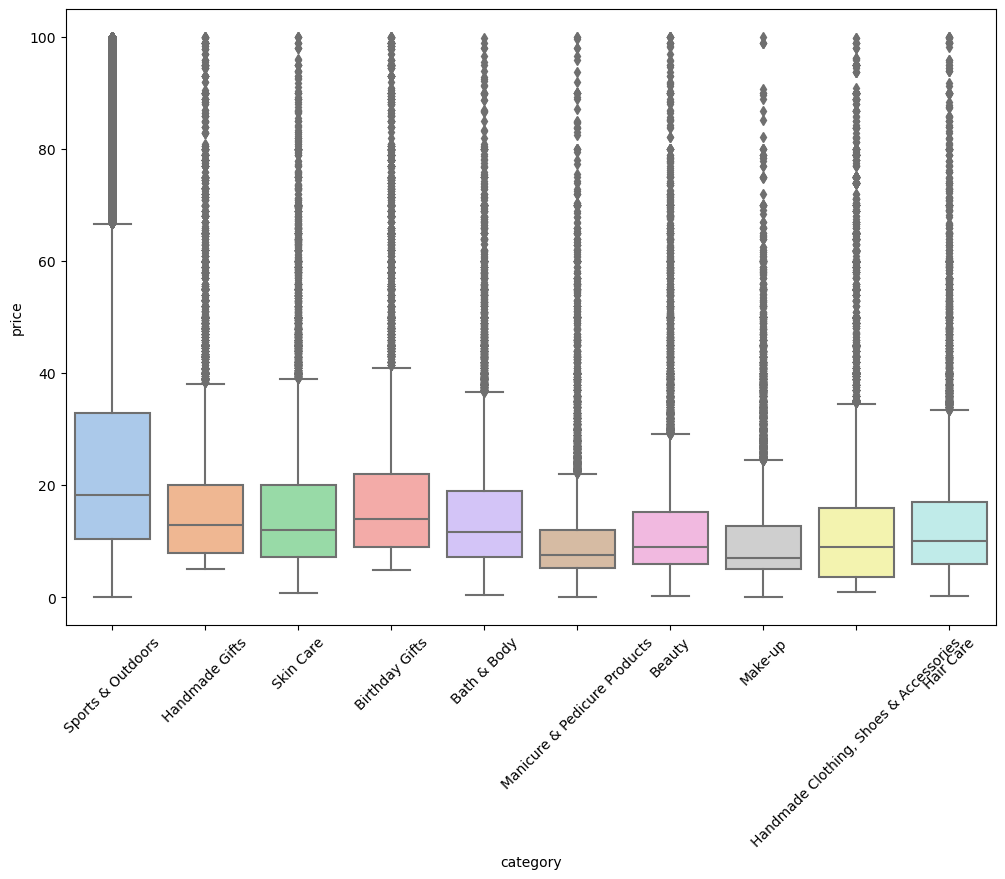

In [63]:
#2.4 Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
top_10_categories = df_price_without_outliers["category"].value_counts().sort_values(ascending=False).head(10).index

filtered_df = df_price_without_outliers[df_price_without_outliers["category"].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='category', y='price', palette="pastel")
plt.xticks(rotation=45)
plt.show() #top categories that receive the highest median rating from customers are sports adn fragances.

### Part 3: Investigating the Interplay Between Product Prices and Ratings

#### Objective: Analyze how product ratings (stars) correlate with product prices.

##### Correlation Coefficients:
- Calculate the correlation coefficient between price and stars.
- Is there a significant correlation between product price and its rating?

##### Visualizations:
- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.

In [66]:
#3.1. Calculate the correlation coefficient between price and stars:
#Pearson correlation:
pearson_correlation = df_price_without_outliers['price'].corr(df['stars'])
print(pearson_correlation)

# Spearman correlation
spearman_correlation = df_price_without_outliers['price'].corr(df_price_without_outliers['stars'], method='spearman')
print(spearman_correlation)


-0.07767299878181323
-0.06679697280768307


#### Pearson correlation value of -0.07 suggests a weak negative linear relationship
#### pearman_correlation value of -0.06 also suggests a  weak negative monotonic relationship.

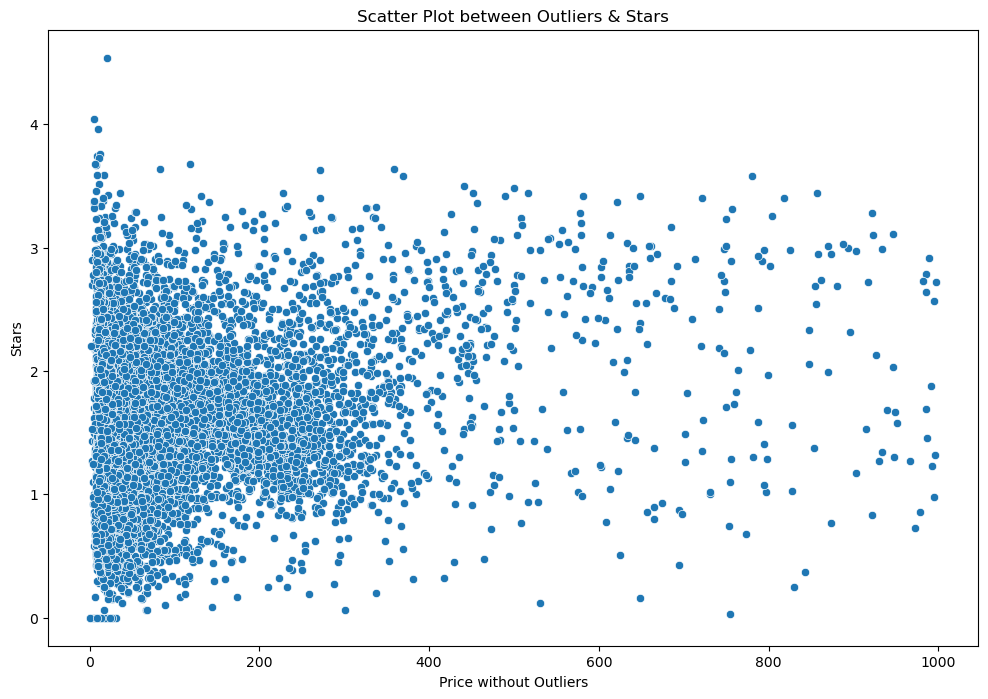

In [68]:
#3.2 use a scatter plot to visualize the relationship between the product rating and price. 
threshold = 1000
price_value_counts = df_price_without_outliers["price"].value_counts().sort_index()
average_ratings = df_price_without_outliers.groupby("price")["stars"].mean().round(2)

filtered_price_counts = price_value_counts[price_value_counts < threshold]

scatter_df = pd.DataFrame({
    "price": filtered_price_counts,
    "avg_rating": average_ratings,
}
)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=scatter_df, x='price', y='avg_rating')
plt.xlabel('Price without Outliers')
plt.ylabel('Stars')
plt.title('Scatter Plot between Outliers & Stars')
plt.show()

#there is no significant correlation between price and rating.

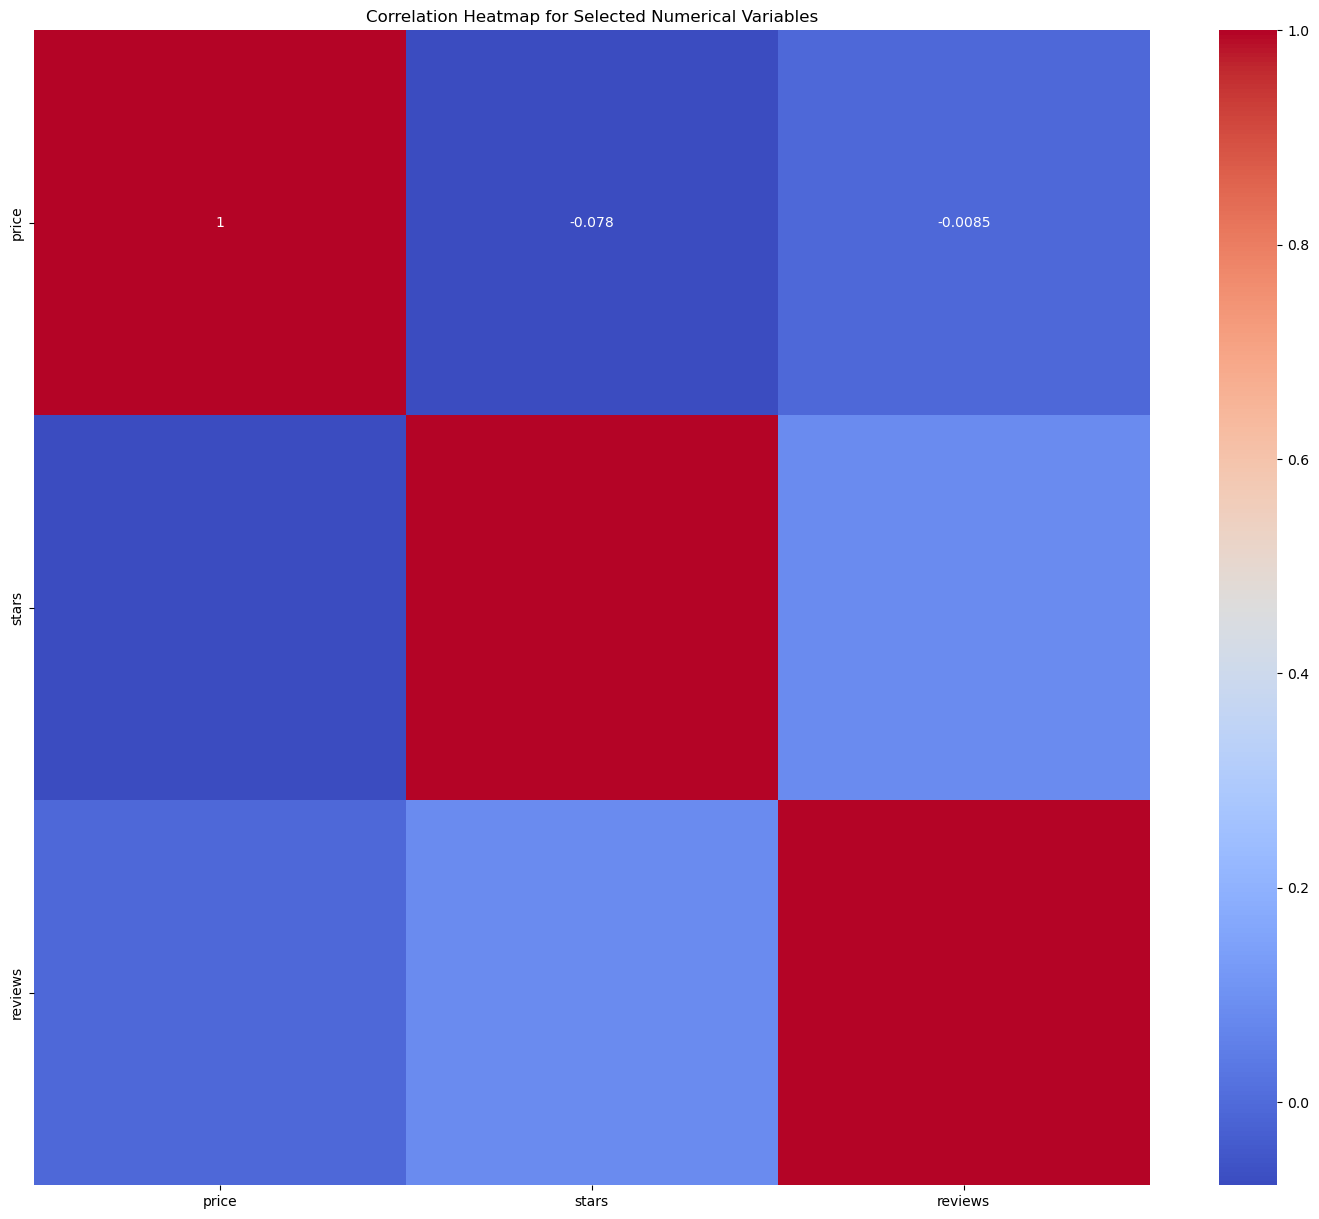

In [69]:
#3.3 Use a correlation heatmap to visualize correlations between all numerical variables.
num_vars= ['price', 'stars', "reviews"]
num_vars_df = df_price_without_outliers[num_vars]

correlation_matrix = num_vars_df.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()


#### No significant corelation is observed

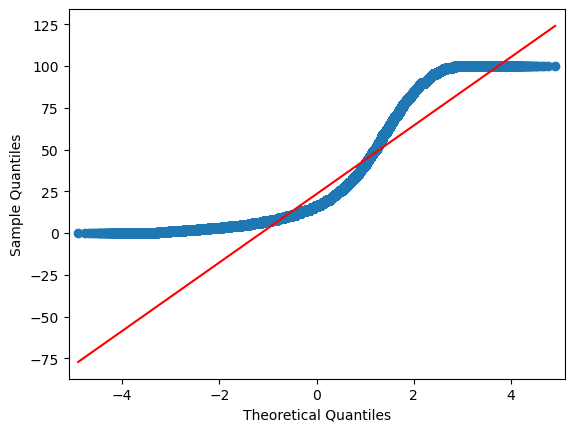

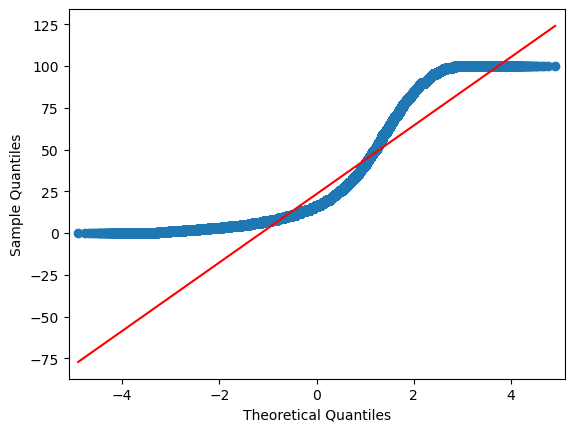

In [72]:
#3.4 Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm
sm.qqplot(df_price_without_outliers['price'], line='s')

#### It does not seem to follow normal distribution